# Games with Word Vectors
## Read Embeddings

In [1]:
import numpy as np
import gensim

In [29]:
t_model = gensim.models.Word2Vec.load('../models/full_grams_cbow_100_wiki/full_grams_cbow_100_wiki.mdl')

In [30]:
wv = np.load('../models/full_grams_cbow_100_wiki/full_grams_cbow_100_wiki.mdl.wv.vectors.npy')

In [86]:
t_model.wv.word_vec('مصر')

array([-6.9719434e-01,  1.5580693e-01,  1.2140844e+00, -4.2588887e+00,
        1.1382728e+00, -8.3858278e-03, -7.0256872e+00, -3.5814658e-01,
       -2.5375071e+00,  3.2092388e+00,  4.5525256e-01,  3.9131463e-01,
        1.6766270e+00,  5.8909410e-01, -6.8786135e+00, -4.0836773e+00,
       -1.3863366e+00, -2.1714196e+00,  1.6940353e+00, -5.8874221e+00,
       -2.3680480e+00, -1.0006251e+01,  5.5951529e+00,  3.6804473e+00,
        9.2855260e-02, -2.5120182e+00, -4.9646993e+00,  1.4438366e+00,
        1.2387954e+00, -3.7790763e-03, -1.9959290e+00, -4.3127689e+00,
       -7.0472770e+00, -3.8579521e-01, -2.0247333e+00, -2.7017605e+00,
       -2.1304204e-01,  7.2056861e+00,  4.0386524e+00,  4.5728910e-01,
       -1.2626036e-01, -1.7640496e+00, -3.7400134e+00,  2.1175127e+00,
       -7.8477204e-01, -3.9282625e+00, -3.6435974e+00,  1.4480541e+00,
        4.8221059e+00, -4.8813701e+00,  6.8460274e-01, -3.2635536e+00,
        1.3637066e+00, -7.7187872e+00, -3.2920418e+00, -5.7508416e+00,
      

In [77]:
i2w = t_model.wv.index2word

## Similarity Methods

In [79]:
def cos_similarity(v1,v2):
    mod_v1 = np.linalg.norm(v1) 
    mod_v2 = np.linalg.norm(v2)
    return np.dot(v1,v2) / (mod_v1 *mod_v2)

In [80]:
v = np.arange(4)

In [81]:
cos_similarity(v,-v)

-1.0

In [82]:
def euclidien(v1,v2):
    return np.linalg.norm(v1-v2)

## Equivelant Words

In [94]:
t_model.wv['شيكابالا']

array([-0.00463298, -0.01515343, -0.0209811 ,  0.13073343,  0.1075708 ,
       -0.01196379,  0.04570002,  0.031405  , -0.02772433,  0.10283896,
       -0.14040676, -0.1270353 ,  0.15067677, -0.01884406, -0.01704196,
        0.07029475, -0.0006389 , -0.01907958, -0.0569649 , -0.05880931,
       -0.08524872, -0.10408543, -0.07577777, -0.06160569,  0.03940865,
        0.03099483,  0.01130068, -0.07601485,  0.0778036 ,  0.02679666,
       -0.06018009,  0.08817021, -0.06063899,  0.1394837 , -0.17484868,
        0.1910811 , -0.00922366,  0.18282364,  0.14911613,  0.1101452 ,
       -0.02733675,  0.03304335, -0.12795436, -0.14182113, -0.02429595,
        0.12938765,  0.08873778,  0.05428515, -0.18494149, -0.0161036 ,
       -0.04335972, -0.27033392, -0.06196185,  0.07294965, -0.16479848,
       -0.2066243 , -0.00718698, -0.10137852, -0.12081021,  0.19958761,
       -0.0655814 ,  0.03188948, -0.08880441,  0.20475057, -0.106736  ,
        0.0460097 ,  0.1223679 ,  0.04174893, -0.01078726,  0.04

In [118]:
def get_vector(country1,city1,city2,model,i2w):
    country1_vec = model.wv.word_vec(country1)
    city1_vec = model.wv.word_vec(city1)
    city2_vec = model.wv.word_vec(city2)
    #country1 - city1 = country2 - city2
    country2_vec = country1_vec - city1_vec + city2_vec
    
    sim = -1
    euc = 1e6
    group = [country1,city1,city2]
    
    for i,word in enumerate(i2w):
        if word not in group:
            l = model.wv.word_vec(word)
            sim_temp = cos_similarity(country2_vec,l)
            euc_temp = euclidien(country2_vec,l)
            if sim < sim_temp:
                sim=sim_temp
                sim_word=word
                #Change word ref
            if euc > euc_temp:
                euc = euc_temp
                euc_word=word

    return sim_word,euc_word

In [137]:
get_vector('مصر','القاهره','القدس',t_model,i2w)

('فلسطين', 'فلسطين')

## Visualize Word Vector with PCA

In [48]:
from sklearn import decomposition
import matplotlib.pyplot as plt

In [67]:
X = dic[:100,:]

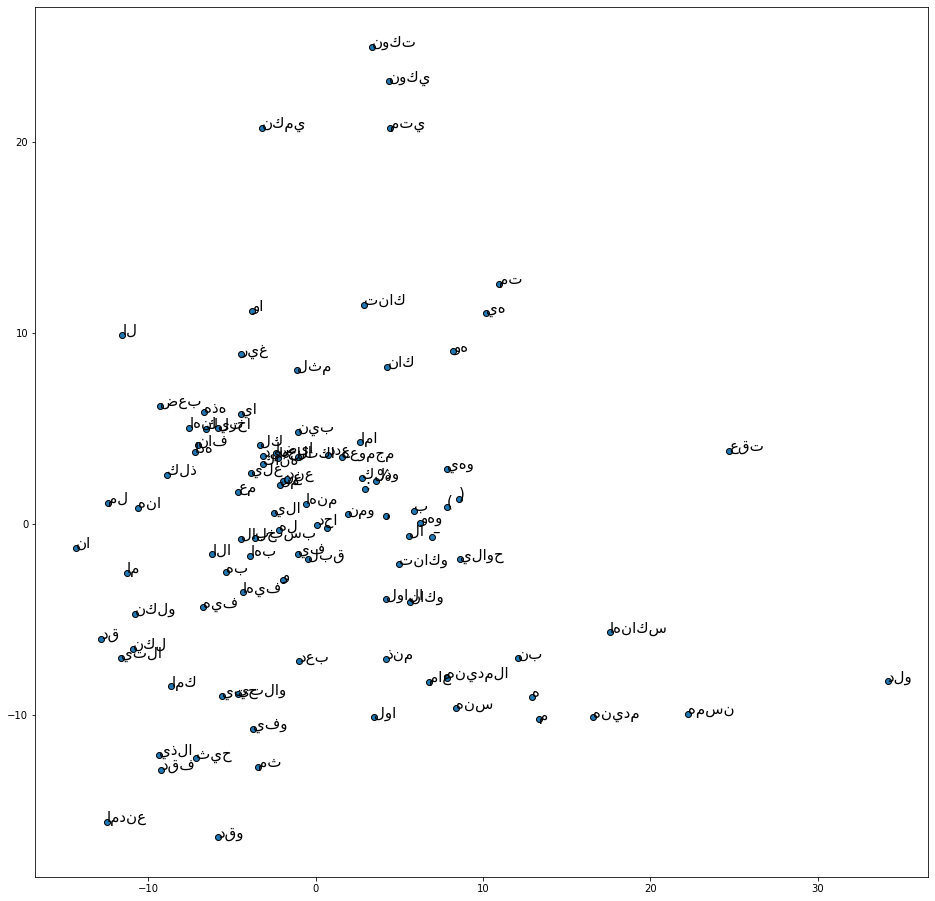

In [68]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

fig,ax = plt.subplots(figsize=(16, 16))

# Reorder the labels to have colors matching the cluster results
ax.scatter(X[:, 0], X[:, 1],  cmap=plt.cm.nipy_spectral,edgecolor='k')
for i in range(len(X)):
    ax.annotate(wv[i][::-1],(X[i,0],X[i,1]),size=15)